In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [3]:
print(train.shape,test.shape)

(1600, 6) (400, 5)


In [4]:
train = train.values

In [5]:
test = test.values

test = (test - test.mean())/(test.std())

one = np.ones((test.shape[0],1))
test = np.hstack((one,test))
print(test.shape)

(400, 6)


In [6]:
X = train[:,:-1]
Y = train[:,-1]
print(X.shape,Y.shape)
print(Y)

(1600, 5) (1600,)
[ -82.15466656  -48.89796018   77.2703707  ... -107.51050797  -47.34155781
 -115.93900296]


In [7]:
X = (X-X.mean())/(X.std())

ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))
print(X.shape)

(1600, 6)


In [20]:
def predict(X,theta):
    return np.dot(X,theta)

def error(X,Y,theta):
    e = 0.0
    n = X.shape[0]
    pred = predict(X,theta)
    e = np.sum((pred-Y)**2)
    
    return e/n

def gradient(X,Y,theta):
    pred = predict(X,theta)
    grad = np.dot(X.T,(pred-Y))
    n = X.shape[0]
    return grad/n

def miniBatchGD(X,Y,batch_size=20,learning_rate=0.01,max_itr=20):
    theta = np.zeros((X.shape[1],))
    error_list = []
    
    data = np.hstack((X,Y.reshape(-1,1)))
    for i in range(max_itr):
        
        np.random.shuffle(data)
        m = data.shape[0]
        total_batches = m//batch_size
        for j in range(total_batches):
            batch = data[j*batch_size:(j+1)*batch_size,:]
            X_batch = batch[:,:-1]
            Y_batch = batch[:,-1]
            
            batch_grad = gradient(X_batch,Y_batch,theta)
            
            theta = theta - learning_rate*batch_grad
            
            e = error(X,Y,theta)
            error_list.append(e)
            
    return theta,error_list

In [21]:
theta,error_list = miniBatchGD(X,Y)
print(theta)

[ 1.49485865 29.82762313 93.14303893  8.28400518 44.87914961  2.54632784]


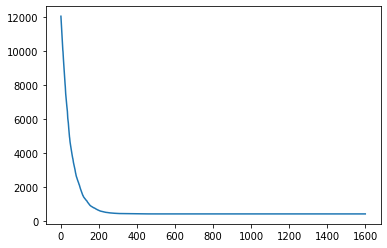

In [22]:
plt.plot(error_list)
plt.show()

In [11]:
pred = predict(test,theta)
print(pred.shape)

(400,)


In [12]:
idx = np.arange(pred.shape[0])
idx = idx.reshape(-1,1)
pred = pred.reshape(-1,1)
pred = np.hstack((idx,pred))
print(idx.shape,pred.shape)
df = pd.DataFrame(pred,columns = ["id","target"])
df.head()

(400, 1) (400, 2)


,id,target
0,0.0,113.323617
1,1.0,116.655277
2,2.0,-23.379662
3,3.0,-45.594968
4,4.0,-97.953686


In [13]:
df.to_csv("predict.csv",index = False)

In [14]:
print(Y.reshape(-1,1))

[[ -82.15466656]
 [ -48.89796018]
 [  77.2703707 ]
 ...
 [-107.51050797]
 [ -47.34155781]
 [-115.93900296]]


In [15]:
final_error = error_list[-1]
print(final_error)

415.6173458757205


In [16]:
pred1 = predict(X,theta)

In [17]:
def r2_score(Y,Y_pred):
    num = np.sum((Y-Y_pred)**2)
    denom = np.sum((Y-Y.mean())**2)
    
    score = 1-num/denom
    return score*100

In [18]:
r2_score(Y,pred1)

96.60927868359241

In [19]:
print(Y.shape)

(1600,)
